In [1]:
#LSTM to evaluate Feature importance via permutation importance method

In [2]:
from keras.layers import LSTM, Dropout, Dense
from keras.models import Sequential 
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
#stack exchange function for feature importance: 
# https://stats.stackexchange.com/questions/191855/variable-importance-in-rnn-or-lstm
def var_importance(model,data):
    x = data
    #x = np.concatenate([next(g)[0] for _ in range(50)]) # Get a sample of data
    orig_out = model.predict(x)
    effects = []
    for i in range(len(x[0,0])):  # iterate over the three features
        new_x = x.copy()
        perturbation = np.random.normal(0.0, 0.2, size=new_x.shape[:2])
        new_x[:, :, i] = new_x[:, :, i] + perturbation
        perturbed_out = model.predict(new_x)
        effect = ((orig_out - perturbed_out) ** 2).mean() ** 0.5
#         print(f'Variable {i}, perturbation effect: {effect:.4f}')
        effects.append(effect)
    return effects

In [4]:
#read data
#Input Data from Neural Analysis Script
path_neural = r"C:\Users\rylab\Documents\Noah2019_desktop\Columbia_Project\Project_Behaviour_and_Neural_Activity\Single_Cell_Analysis_Neural\Single_Cell_Data\VID1_oct_4_3hz\Results\denoised_neuraldata.csv"
path_behaviour = r"C:\Users\rylab\Documents\Noah2019_desktop\Columbia_Project\Project_Behaviour_and_Neural_Activity\Single_Cell_Analysis_Neural\Single_Cell_Data\VID1_oct_4_3hz\Results\behav_array.csv"
behav = pd.read_csv(path_behaviour, index_col = 0)
neurons = pd.read_csv(path_neural, index_col = 0)

In [5]:
behaviour = behav.values
#b1 = elongation ; b2 = contraction
behaviour_encoded = to_categorical(behaviour)
behaviour_encoded_1 = behaviour_encoded[:,0]
behaviour_encoded_2 = behaviour_encoded[:,1]
behaviour1 = behaviour_encoded_1.reshape(852,1)
behaviour2 = behaviour_encoded_2.reshape(852,1)

neural_activity = np.transpose(neurons.values)
neural_activity = neural_activity.reshape(852,1,51)
print(neural_activity.shape)
#(no. samples, no. features)

(852, 1, 51)


In [6]:
#delayed behaviour for future prediction
#recordings @ 10Hz : 0.1s per frame
delay = 20
behaviour_encoded_1 = behaviour1[delay:len(behaviour1)]
behaviour_encoded_2 = behaviour2[delay:len(behaviour2)]
neural_activity = neural_activity[0:len(neural_activity)-delay]

In [7]:
print(neural_activity.shape)
print(behaviour_encoded_2.shape)

(832, 1, 51)
(832, 1)


In [8]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(neural_activity, behaviour_encoded_2, test_size = 0.2, shuffle = False)

In [9]:
x_train1.shape

(665, 1, 51)

In [10]:
#build network
time_duration = x_train1.shape[1] 
num_features = x_train1.shape[2]  
model = Sequential()

model.add(LSTM(32, dropout = 0.1, recurrent_dropout=0.1, input_shape = (time_duration, num_features)))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'softsign'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
#training small batches seem better
model.fit(x_train1, y_train1, batch_size=10, epochs=1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
665/665 [==============================] - 1s 2ms/step - loss: 0.3510 - acc: 0.5910
Epoch 2/1000
665/665 [==============================] - 0s 204us/step - loss: 0.2796 - acc: 0.5910
Epoch 3/1000
665/665 [==============================] - 0s 207us/step - loss: 0.2500 - acc: 0.5940
Epoch 4/1000
665/665 [==============================] - 0s 200us/step - loss: 0.2409 - acc: 0.5985
Epoch 5/1000
665/665 [==============================] - 0s 212us/step - loss: 0.2368 - acc: 0.6060
Epoch 6/1000
665/665 [==============================] - 0s 203us/step - loss: 0.2314 - acc: 0.6195
Epoch 7/1000
665/665 [==============================] - 0s 200us/step - loss: 0.2321 - acc: 0.6075
Epoch 8/1000
665/665 [==============================] - 0s 210us/step - loss: 0.2306 - acc: 0.6165
Epoch 9/1000
665/665 [==============================] - 0s 206us/step - loss: 0.2307 - acc: 0.6135
Epoch 10/1000
665/665 [==============================] - 0s 204

665/665 [==============================] - 0s 230us/step - loss: 0.1211 - acc: 0.8692
Epoch 81/1000
665/665 [==============================] - 0s 216us/step - loss: 0.1249 - acc: 0.8541
Epoch 82/1000
665/665 [==============================] - 0s 212us/step - loss: 0.1230 - acc: 0.8632
Epoch 83/1000
665/665 [==============================] - 0s 216us/step - loss: 0.1215 - acc: 0.8662
Epoch 84/1000
665/665 [==============================] - 0s 219us/step - loss: 0.1234 - acc: 0.8511
Epoch 85/1000
665/665 [==============================] - 0s 218us/step - loss: 0.1211 - acc: 0.8707
Epoch 86/1000
665/665 [==============================] - 0s 221us/step - loss: 0.1220 - acc: 0.8541
Epoch 87/1000
665/665 [==============================] - 0s 215us/step - loss: 0.1191 - acc: 0.8782
Epoch 88/1000
665/665 [==============================] - 0s 215us/step - loss: 0.1212 - acc: 0.8752
Epoch 89/1000
665/665 [==============================] - 0s 216us/step - loss: 0.1204 - acc: 0.8812
Epoch 90/1000


665/665 [==============================] - 0s 227us/step - loss: 0.1040 - acc: 0.8932
Epoch 162/1000
665/665 [==============================] - 0s 213us/step - loss: 0.1059 - acc: 0.8902
Epoch 163/1000
665/665 [==============================] - 0s 222us/step - loss: 0.1069 - acc: 0.8947
Epoch 164/1000
665/665 [==============================] - 0s 216us/step - loss: 0.1065 - acc: 0.8887
Epoch 165/1000
665/665 [==============================] - 0s 219us/step - loss: 0.1038 - acc: 0.8917
Epoch 166/1000
665/665 [==============================] - 0s 212us/step - loss: 0.1035 - acc: 0.8947
Epoch 167/1000
665/665 [==============================] - 0s 221us/step - loss: 0.1047 - acc: 0.8812
Epoch 168/1000
665/665 [==============================] - 0s 224us/step - loss: 0.1046 - acc: 0.9008
Epoch 169/1000
665/665 [==============================] - 0s 212us/step - loss: 0.1038 - acc: 0.8842
Epoch 170/1000
665/665 [==============================] - 0s 216us/step - loss: 0.1067 - acc: 0.8917
Epoch

665/665 [==============================] - 0s 216us/step - loss: 0.0985 - acc: 0.9068
Epoch 243/1000
665/665 [==============================] - 0s 209us/step - loss: 0.0981 - acc: 0.8962
Epoch 244/1000
665/665 [==============================] - 0s 210us/step - loss: 0.0942 - acc: 0.9053
Epoch 245/1000
665/665 [==============================] - 0s 198us/step - loss: 0.0967 - acc: 0.9023
Epoch 246/1000
665/665 [==============================] - 0s 201us/step - loss: 0.0990 - acc: 0.8992
Epoch 247/1000
665/665 [==============================] - 0s 204us/step - loss: 0.1000 - acc: 0.8992
Epoch 248/1000
665/665 [==============================] - 0s 198us/step - loss: 0.0958 - acc: 0.8977
Epoch 249/1000
665/665 [==============================] - 0s 204us/step - loss: 0.0953 - acc: 0.9098
Epoch 250/1000
665/665 [==============================] - 0s 201us/step - loss: 0.1003 - acc: 0.8917
Epoch 251/1000
665/665 [==============================] - 0s 207us/step - loss: 0.0989 - acc: 0.8962
Epoch

665/665 [==============================] - 0s 227us/step - loss: 0.0905 - acc: 0.9083
Epoch 324/1000
665/665 [==============================] - 0s 216us/step - loss: 0.0890 - acc: 0.9143
Epoch 325/1000
665/665 [==============================] - 0s 219us/step - loss: 0.0908 - acc: 0.9023
Epoch 326/1000
665/665 [==============================] - 0s 219us/step - loss: 0.0924 - acc: 0.9098
Epoch 327/1000
665/665 [==============================] - 0s 225us/step - loss: 0.0922 - acc: 0.8992
Epoch 328/1000
665/665 [==============================] - 0s 215us/step - loss: 0.0913 - acc: 0.9023
Epoch 329/1000
665/665 [==============================] - 0s 222us/step - loss: 0.0898 - acc: 0.9053
Epoch 330/1000
665/665 [==============================] - 0s 225us/step - loss: 0.0927 - acc: 0.8962
Epoch 331/1000
665/665 [==============================] - 0s 206us/step - loss: 0.0893 - acc: 0.9038
Epoch 332/1000
665/665 [==============================] - 0s 201us/step - loss: 0.0883 - acc: 0.9098
Epoch

665/665 [==============================] - 0s 203us/step - loss: 0.0837 - acc: 0.9143
Epoch 404/1000
665/665 [==============================] - 0s 200us/step - loss: 0.0817 - acc: 0.9083
Epoch 405/1000
665/665 [==============================] - 0s 200us/step - loss: 0.0820 - acc: 0.9113
Epoch 406/1000
665/665 [==============================] - 0s 200us/step - loss: 0.0839 - acc: 0.9038
Epoch 407/1000
665/665 [==============================] - 0s 207us/step - loss: 0.0832 - acc: 0.9113
Epoch 408/1000
665/665 [==============================] - 0s 200us/step - loss: 0.0847 - acc: 0.9143
Epoch 409/1000
665/665 [==============================] - 0s 206us/step - loss: 0.0798 - acc: 0.9173
Epoch 410/1000
665/665 [==============================] - 0s 219us/step - loss: 0.0797 - acc: 0.9083
Epoch 411/1000
665/665 [==============================] - 0s 218us/step - loss: 0.0787 - acc: 0.9158
Epoch 412/1000
665/665 [==============================] - 0s 215us/step - loss: 0.0844 - acc: 0.9053
Epoch

665/665 [==============================] - 0s 213us/step - loss: 0.0752 - acc: 0.9233
Epoch 484/1000
665/665 [==============================] - 0s 200us/step - loss: 0.0702 - acc: 0.9323
Epoch 485/1000
665/665 [==============================] - 0s 201us/step - loss: 0.0723 - acc: 0.9203
Epoch 486/1000
665/665 [==============================] - 0s 218us/step - loss: 0.0728 - acc: 0.9308
Epoch 487/1000
665/665 [==============================] - 0s 206us/step - loss: 0.0721 - acc: 0.9233
Epoch 488/1000
665/665 [==============================] - 0s 200us/step - loss: 0.0748 - acc: 0.9248
Epoch 489/1000
665/665 [==============================] - 0s 198us/step - loss: 0.0694 - acc: 0.9293
Epoch 490/1000
665/665 [==============================] - 0s 209us/step - loss: 0.0706 - acc: 0.9293
Epoch 491/1000
665/665 [==============================] - 0s 200us/step - loss: 0.0744 - acc: 0.9218
Epoch 492/1000
665/665 [==============================] - 0s 198us/step - loss: 0.0725 - acc: 0.9308
Epoch

665/665 [==============================] - 0s 206us/step - loss: 0.0636 - acc: 0.9398
Epoch 565/1000
665/665 [==============================] - 0s 197us/step - loss: 0.0685 - acc: 0.9368
Epoch 566/1000
665/665 [==============================] - 0s 200us/step - loss: 0.0662 - acc: 0.9338
Epoch 567/1000
665/665 [==============================] - 0s 206us/step - loss: 0.0684 - acc: 0.9263
Epoch 568/1000
665/665 [==============================] - 0s 201us/step - loss: 0.0639 - acc: 0.9323
Epoch 569/1000
665/665 [==============================] - 0s 198us/step - loss: 0.0670 - acc: 0.9353
Epoch 570/1000
665/665 [==============================] - 0s 200us/step - loss: 0.0647 - acc: 0.9353
Epoch 571/1000
665/665 [==============================] - 0s 198us/step - loss: 0.0628 - acc: 0.9353
Epoch 572/1000
665/665 [==============================] - 0s 198us/step - loss: 0.0617 - acc: 0.9414
Epoch 573/1000
665/665 [==============================] - 0s 201us/step - loss: 0.0622 - acc: 0.9383
Epoch

665/665 [==============================] - 0s 219us/step - loss: 0.0601 - acc: 0.9383
Epoch 646/1000
665/665 [==============================] - 0s 225us/step - loss: 0.0599 - acc: 0.9368
Epoch 647/1000
665/665 [==============================] - 0s 213us/step - loss: 0.0580 - acc: 0.9474
Epoch 648/1000
665/665 [==============================] - 0s 222us/step - loss: 0.0604 - acc: 0.9444
Epoch 649/1000
665/665 [==============================] - 0s 215us/step - loss: 0.0588 - acc: 0.9398
Epoch 650/1000
665/665 [==============================] - 0s 218us/step - loss: 0.0613 - acc: 0.9353
Epoch 651/1000
665/665 [==============================] - 0s 219us/step - loss: 0.0638 - acc: 0.9368
Epoch 652/1000
665/665 [==============================] - 0s 221us/step - loss: 0.0616 - acc: 0.9398
Epoch 653/1000
665/665 [==============================] - 0s 227us/step - loss: 0.0574 - acc: 0.9414
Epoch 654/1000
665/665 [==============================] - 0s 218us/step - loss: 0.0595 - acc: 0.9444
Epoch

665/665 [==============================] - 0s 212us/step - loss: 0.0544 - acc: 0.9444
Epoch 727/1000
665/665 [==============================] - 0s 201us/step - loss: 0.0551 - acc: 0.9459
Epoch 728/1000
665/665 [==============================] - 0s 200us/step - loss: 0.0542 - acc: 0.9549
Epoch 729/1000
665/665 [==============================] - 0s 198us/step - loss: 0.0568 - acc: 0.9414
Epoch 730/1000
665/665 [==============================] - 0s 206us/step - loss: 0.0561 - acc: 0.9474
Epoch 731/1000
665/665 [==============================] - 0s 203us/step - loss: 0.0581 - acc: 0.9534
Epoch 732/1000
665/665 [==============================] - 0s 210us/step - loss: 0.0569 - acc: 0.9429
Epoch 733/1000
665/665 [==============================] - 0s 203us/step - loss: 0.0556 - acc: 0.9489
Epoch 734/1000
665/665 [==============================] - 0s 210us/step - loss: 0.0529 - acc: 0.9474
Epoch 735/1000
665/665 [==============================] - 0s 197us/step - loss: 0.0571 - acc: 0.9383
Epoch

665/665 [==============================] - 0s 207us/step - loss: 0.0484 - acc: 0.9579
Epoch 807/1000
665/665 [==============================] - 0s 210us/step - loss: 0.0518 - acc: 0.9504
Epoch 808/1000
665/665 [==============================] - 0s 203us/step - loss: 0.0511 - acc: 0.9489
Epoch 809/1000
665/665 [==============================] - 0s 201us/step - loss: 0.0488 - acc: 0.9609
Epoch 810/1000
665/665 [==============================] - 0s 204us/step - loss: 0.0542 - acc: 0.9444
Epoch 811/1000
665/665 [==============================] - 0s 203us/step - loss: 0.0480 - acc: 0.9579
Epoch 812/1000
665/665 [==============================] - 0s 198us/step - loss: 0.0519 - acc: 0.9414
Epoch 813/1000
665/665 [==============================] - 0s 198us/step - loss: 0.0491 - acc: 0.9564
Epoch 814/1000
665/665 [==============================] - 0s 201us/step - loss: 0.0514 - acc: 0.9444
Epoch 815/1000
665/665 [==============================] - 0s 209us/step - loss: 0.0513 - acc: 0.9519
Epoch

665/665 [==============================] - 0s 218us/step - loss: 0.0482 - acc: 0.9549
Epoch 888/1000
665/665 [==============================] - 0s 221us/step - loss: 0.0500 - acc: 0.9519
Epoch 889/1000
665/665 [==============================] - 0s 216us/step - loss: 0.0432 - acc: 0.9609
Epoch 890/1000
665/665 [==============================] - 0s 224us/step - loss: 0.0491 - acc: 0.9519
Epoch 891/1000
665/665 [==============================] - 0s 215us/step - loss: 0.0459 - acc: 0.9564
Epoch 892/1000
665/665 [==============================] - 0s 231us/step - loss: 0.0494 - acc: 0.9504
Epoch 893/1000
665/665 [==============================] - 0s 215us/step - loss: 0.0451 - acc: 0.9654
Epoch 894/1000
665/665 [==============================] - 0s 243us/step - loss: 0.0467 - acc: 0.9564
Epoch 895/1000
665/665 [==============================] - 0s 252us/step - loss: 0.0492 - acc: 0.9534
Epoch 896/1000
665/665 [==============================] - 0s 219us/step - loss: 0.0475 - acc: 0.9579
Epoch

Epoch 968/1000
665/665 [==============================] - 0s 201us/step - loss: 0.0426 - acc: 0.9639
Epoch 969/1000
665/665 [==============================] - 0s 201us/step - loss: 0.0440 - acc: 0.9654
Epoch 970/1000
665/665 [==============================] - 0s 200us/step - loss: 0.0412 - acc: 0.9609
Epoch 971/1000
665/665 [==============================] - 0s 213us/step - loss: 0.0432 - acc: 0.9624
Epoch 972/1000
665/665 [==============================] - 0s 198us/step - loss: 0.0411 - acc: 0.9624
Epoch 973/1000
665/665 [==============================] - 0s 201us/step - loss: 0.0440 - acc: 0.9594
Epoch 974/1000
665/665 [==============================] - 0s 221us/step - loss: 0.0445 - acc: 0.9639
Epoch 975/1000
665/665 [==============================] - 0s 216us/step - loss: 0.0447 - acc: 0.9579
Epoch 976/1000
665/665 [==============================] - 0s 215us/step - loss: 0.0436 - acc: 0.9639
Epoch 977/1000
665/665 [==============================] - 0s 222us/step - loss: 0.0441 - ac

In [12]:
acc = model.evaluate(x_test1, y_test1)
print(' Loss: ', acc[0], '\n', 'Accuracy: ', acc[1])

167/167 [==============================] - 0s 2ms/step
 Loss:  0.030265966017624574 
 Accuracy:  0.9820359281437125


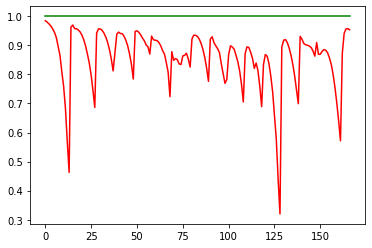

Correlation:  nan


C:\Users\rylab\AppData\Local\Continuum\anaconda3\envs\lstm\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\rylab\AppData\Local\Continuum\anaconda3\envs\lstm\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [13]:
results = model.predict(x_test1)
plt.figure(1)
plt.plot(results, c = 'r')
plt.plot(y_test1, c = 'g')
plt.show()
print('Correlation: ', np.corrcoef(np.transpose(y_test1), np.transpose(results))[0,1])

In [14]:
effects = var_importance(model, x_train1)
effects = np.asanyarray(effects)

In [15]:
topn = 10
max_vals = np.flip(effects.argsort()[-topn::])
print('maximum effect variable = ', max_vals)

maximum effect variable =  [17  9 19  8 26 11 20 30 38 34]


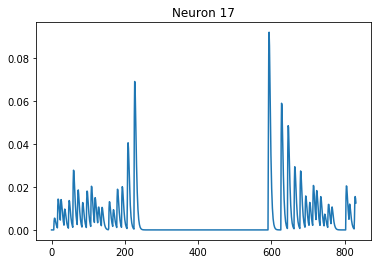

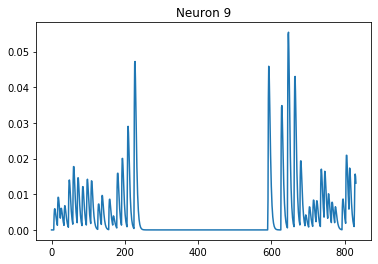

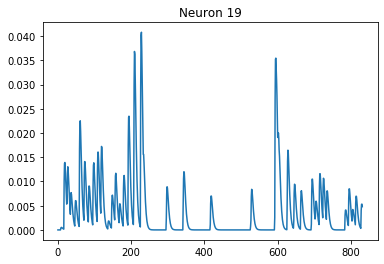

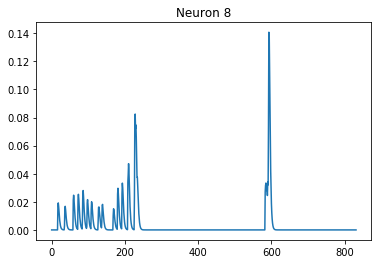

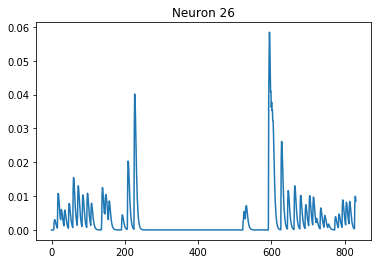

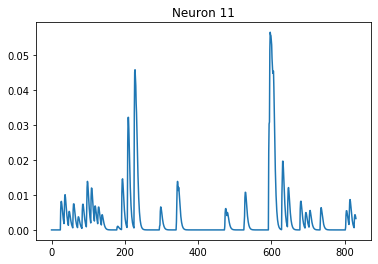

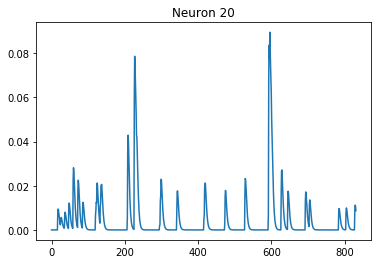

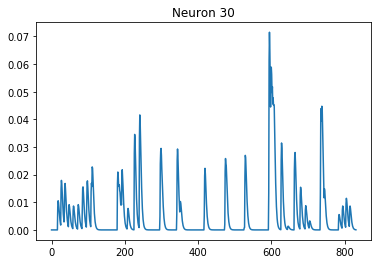

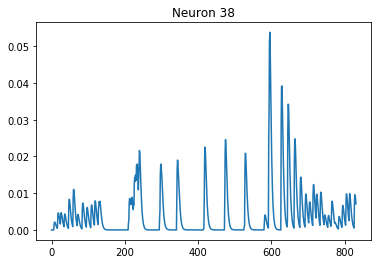

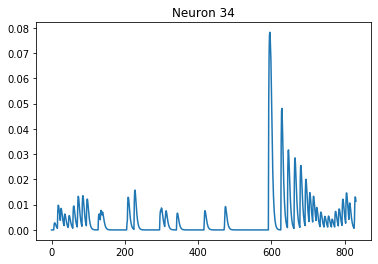

In [16]:
for neuron in max_vals:
    plt.plot(np.transpose(neural_activity[:,0,neuron]))
    title = 'Neuron ' + str(neuron) 
    plt.title(title)
    plt.show()